# Case study on unsupervised learning

Try out different clustering models in the given dataset. Find the optimum 
number of clusters in each model and create the model with optimum number of 
clusters. Also learn about dB scan clustering and implement it

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings                       
warnings.filterwarnings("ignore")

### Loading data

In [5]:
df=pd.read_csv(r"C:\Users\msham\Documents\Data science\Case study on Unsupervised learning\Wine_clust.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Analysing and Preprocessing Data

In [6]:
df.shape

(178, 13)

In [7]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df=scalar.fit_transform(df)

### KMeans Clustering

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,13):
    
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

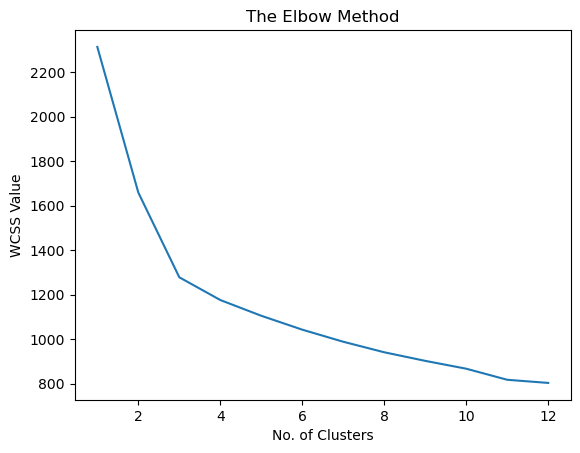

In [10]:
plt.plot(range(1,13),wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Value')
plt.show()

## No. of Clusters = 3

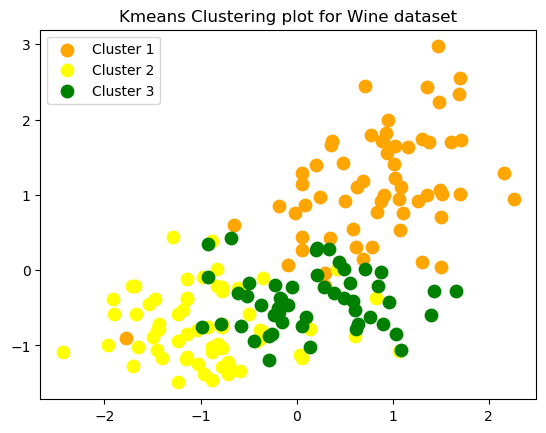

In [11]:
cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(df)
pred_kmeans = model_kmeans.labels_
plt.scatter(df[pred_kmeans == 0, 0], df[pred_kmeans == 0, 12], s = 80, c = 'orange', label = 'Cluster 1')
plt.scatter(df[pred_kmeans == 1, 0], df[pred_kmeans == 1, 12], s = 80, c = 'yellow', label = 'Cluster 2')
plt.scatter(df[pred_kmeans == 2, 0],df[pred_kmeans == 2, 12], s = 80, c = 'green', label = 'Cluster 3')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

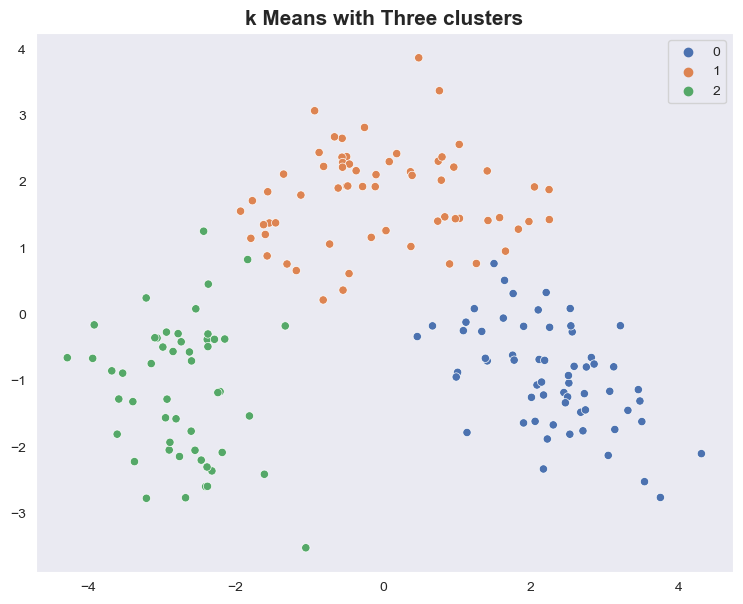

In [12]:
from sklearn import decomposition
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
wine_pca = pca.fit_transform(df)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=pred_kmeans, x=wine_pca[:,0], y=wine_pca[:,1],palette="deep")
plt.title("k Means with Three clusters",fontsize=15,fontweight="bold")
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(df,pred_kmeans)
sil_avg

0.2848589191898987

## DBScan Clustering

### Deciding optimal value for epsilon

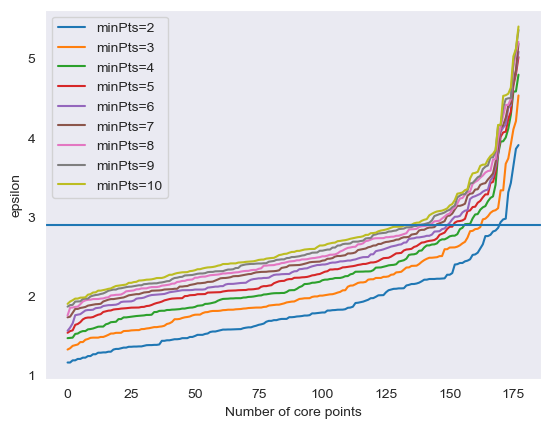

In [14]:
from sklearn.neighbors import NearestNeighbors


neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(2.9)

plt.legend()
plt.show()

#### epsilon is 3 & min point 2 !!

In [15]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3 ,min_samples=2)
dbscan.fit(df)
clusters = dbscan.labels_
len(set(clusters))

4

In [16]:
unique, counts = np.unique(clusters, return_counts=True)
np.asarray((unique, counts)).T

array([[ -1,   5],
       [  0, 168],
       [  1,   3],
       [  2,   2]], dtype=int64)

In [17]:
s = silhouette_score(df,clusters)
s

0.1342575010132213

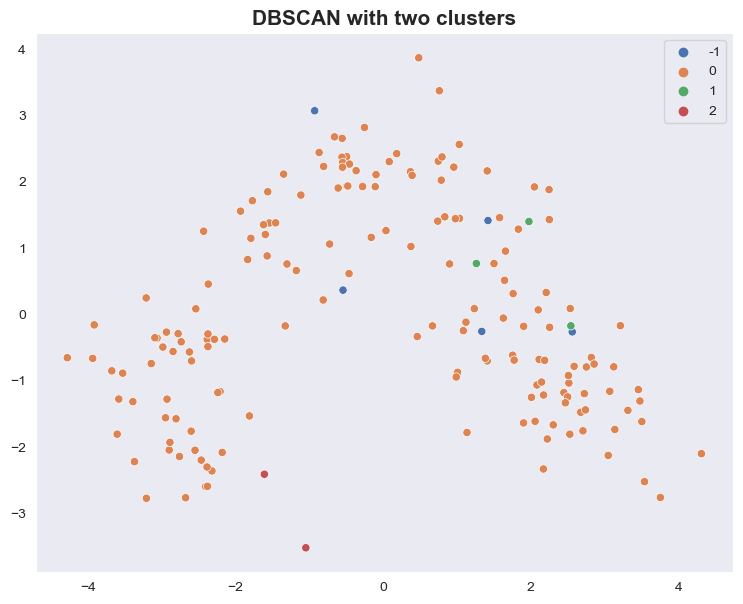

In [18]:
from sklearn import decomposition
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
df_pca = pca.fit_transform(df)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=df_pca[:,0], y=df_pca[:,1],palette="deep")
plt.title("DBSCAN with two clusters",fontsize=15,fontweight="bold")
plt.show()

### Agglomerative Hierarchial Clustering

In [19]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

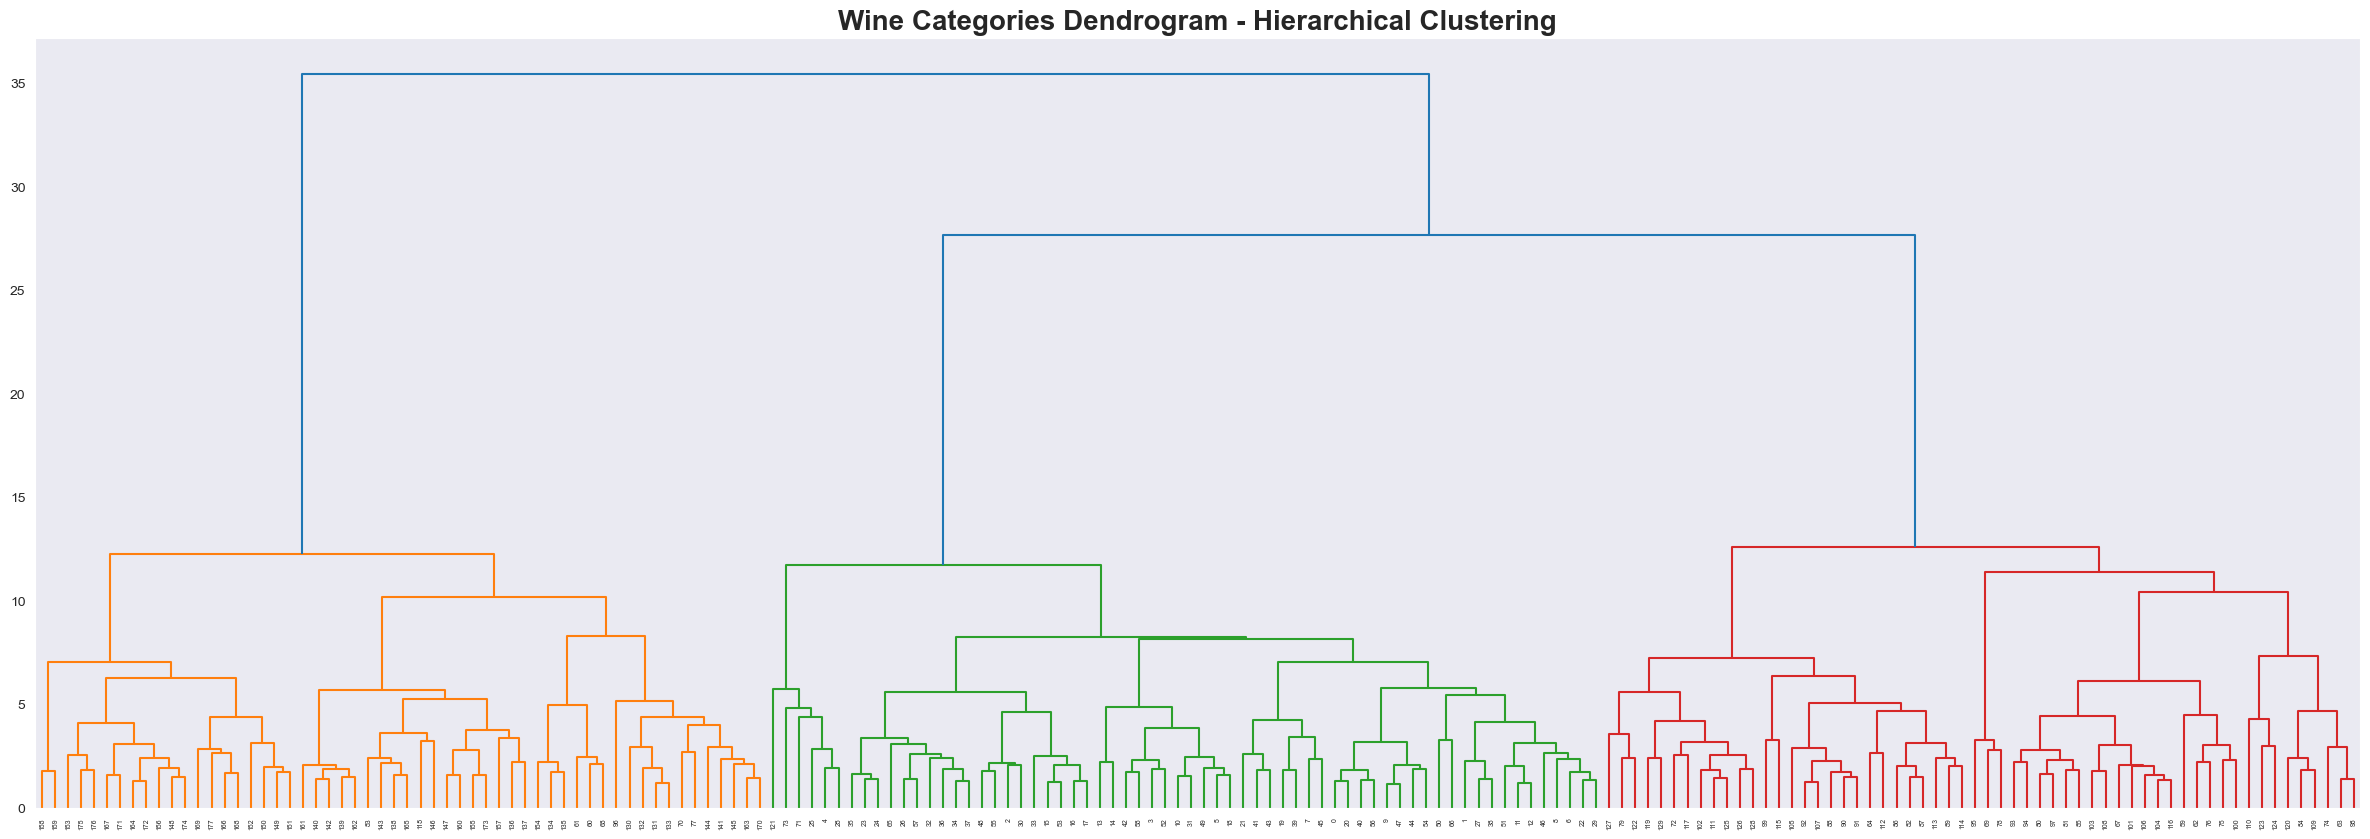

In [20]:
Z = linkage(df, method = "ward", metric = "euclidean")
plt.figure(figsize=(30, 10))
plt.title("Wine Categories Dendrogram - Hierarchical Clustering",fontsize=20,fontweight="bold")
dend = shc.dendrogram(Z)

In [22]:
cluster = AgglomerativeClustering(n_clusters=3 , affinity='euclidean',linkage='ward',compute_distances=True)
labels_=cluster.fit_predict(df)
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [23]:
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 58],
       [ 1, 56],
       [ 2, 64]], dtype=int64)

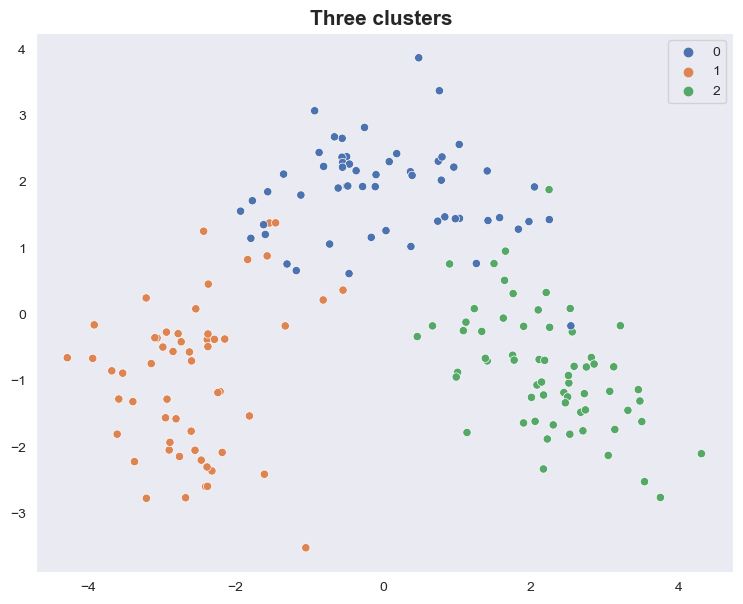

In [24]:
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
win_pca = pca.fit_transform(df)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=cluster.labels_, x=win_pca[:,0], y=win_pca[:,1],palette="deep")
plt.title("Three clusters ",fontsize=15,fontweight="bold")
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(df)
sil_avg_=silhouette_score(df,y_hc)
sil_avg_

0.2774439826952265

## Bestt Score is of KMEans